In [1]:
import matplotlib.pyplot as plt 
from scipy.fft import fft, fftfreq
import pydub
import numpy as np

In [2]:
#https://stackoverflow.com/questions/53633177/how-to-read-a-mp3-audio-file-into-a-numpy-array-save-a-numpy-array-to-mp3
def read(f, normalized=False):
    """MP3 to numpy array"""
    a = pydub.AudioSegment.from_mp3(f)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    if normalized:
        return a.frame_rate, np.float32(y) / 2**15
    else:
        return a.frame_rate, y

In [3]:
audio = read('furelise.mp3') #read audio file into a time series

In [4]:
audio[1][:,0]

array([ 0,  0,  0, ...,  1, -4, -2], dtype=int16)

In [5]:
len(audio[1][:,0])

9353216

In [6]:
audio

(44100,
 array([[ 0,  0],
        [ 0,  0],
        [ 0,  0],
        ...,
        [ 1,  1],
        [-4,  2],
        [-2, -1]], dtype=int16))

In [7]:
f = audio[0]

In [8]:
type(audio)

tuple

In [9]:
audio_l = audio[1][:,0]

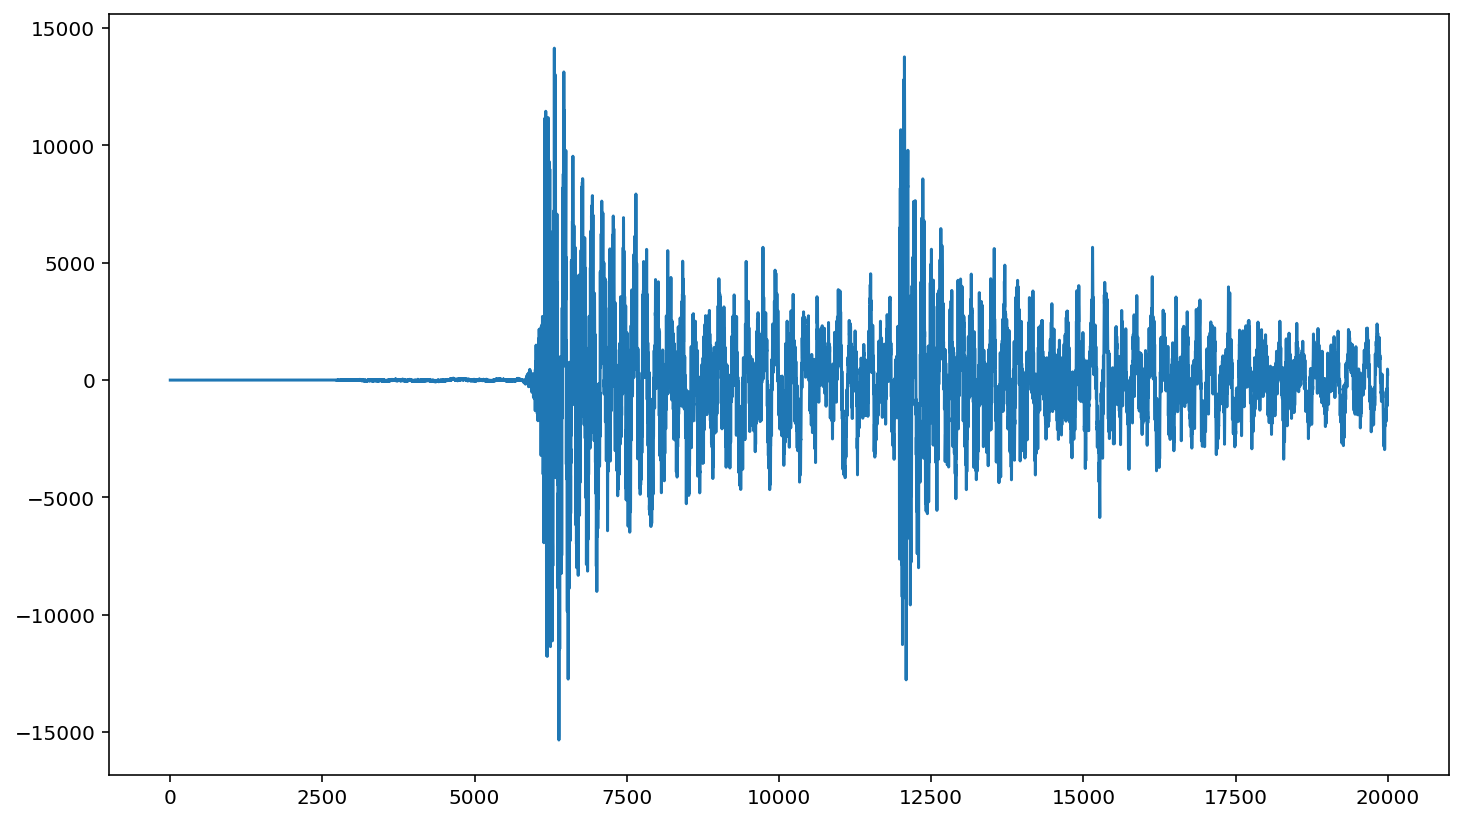

In [10]:
plt.plot(audio_l[:20000]) #plot the time series over time 
plt.show()

In [11]:
n = len(audio_l)
fft_plot = fft(audio_l[:20000])

In [12]:
fft_plot

array([-173815.             -0.j        ,
        -75901.29630799 +37682.32330613j,
       -110928.55141904-143168.22764491j, ...,
         47024.80691214-247435.19983268j,
       -110928.55141904+143168.22764491j,
        -75901.29630799 -37682.32330613j])

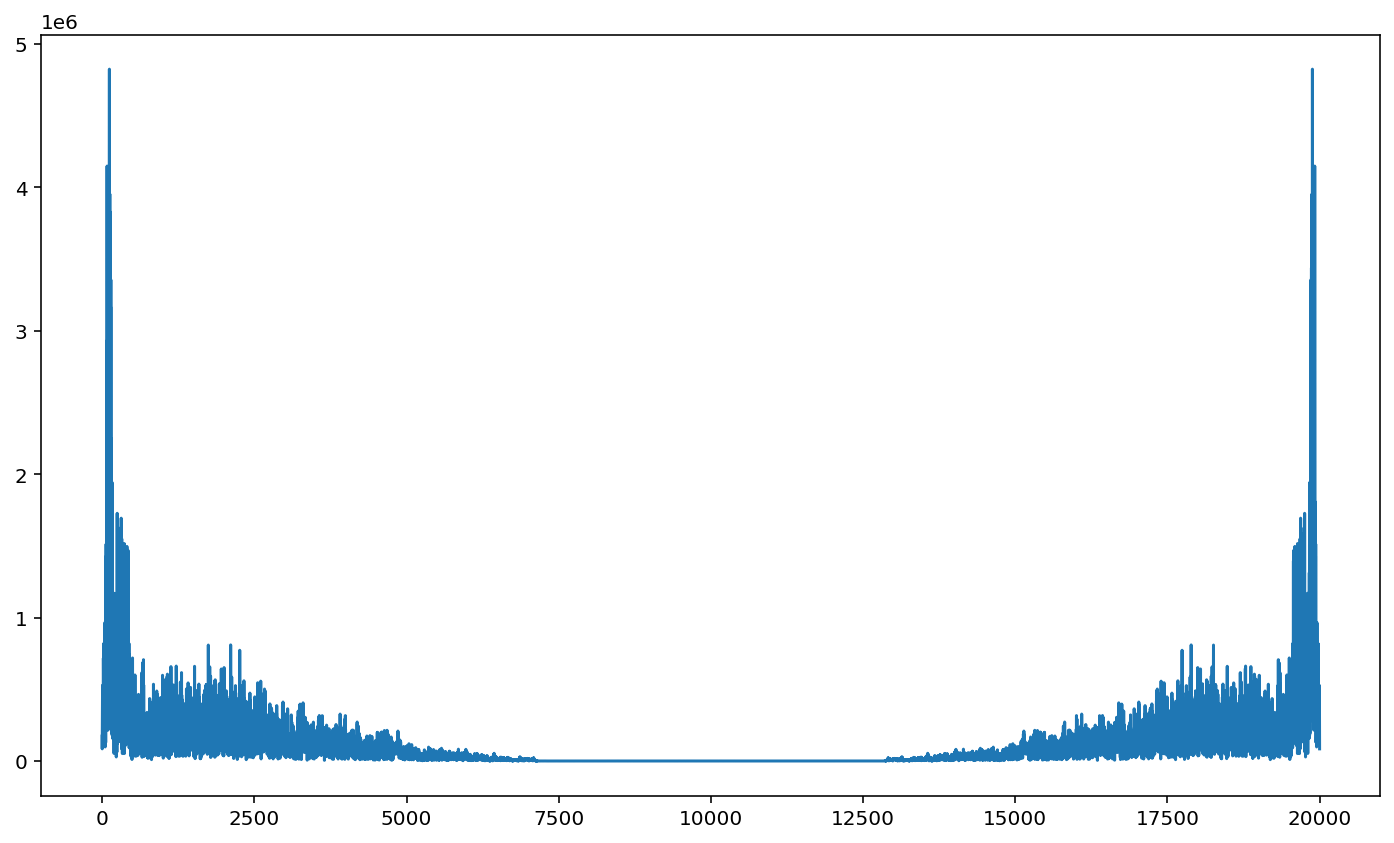

In [13]:
plt.plot(np.abs(fft_plot)) #fft for the first half second 
plt.show()

In [18]:
#DFT code to demonstrate how much slow it is
#adapted from julia code in youtu.be/g8RkArhtCc4
def dft(signal):
    N = len(signal)
    zeta=np.exp(-2 * np.pi *1j / (N-1))
    
    x = [ sum([signal[n] * zeta**((n-1)*f) for n in range(N)]) for f in range(N) ]
    return x


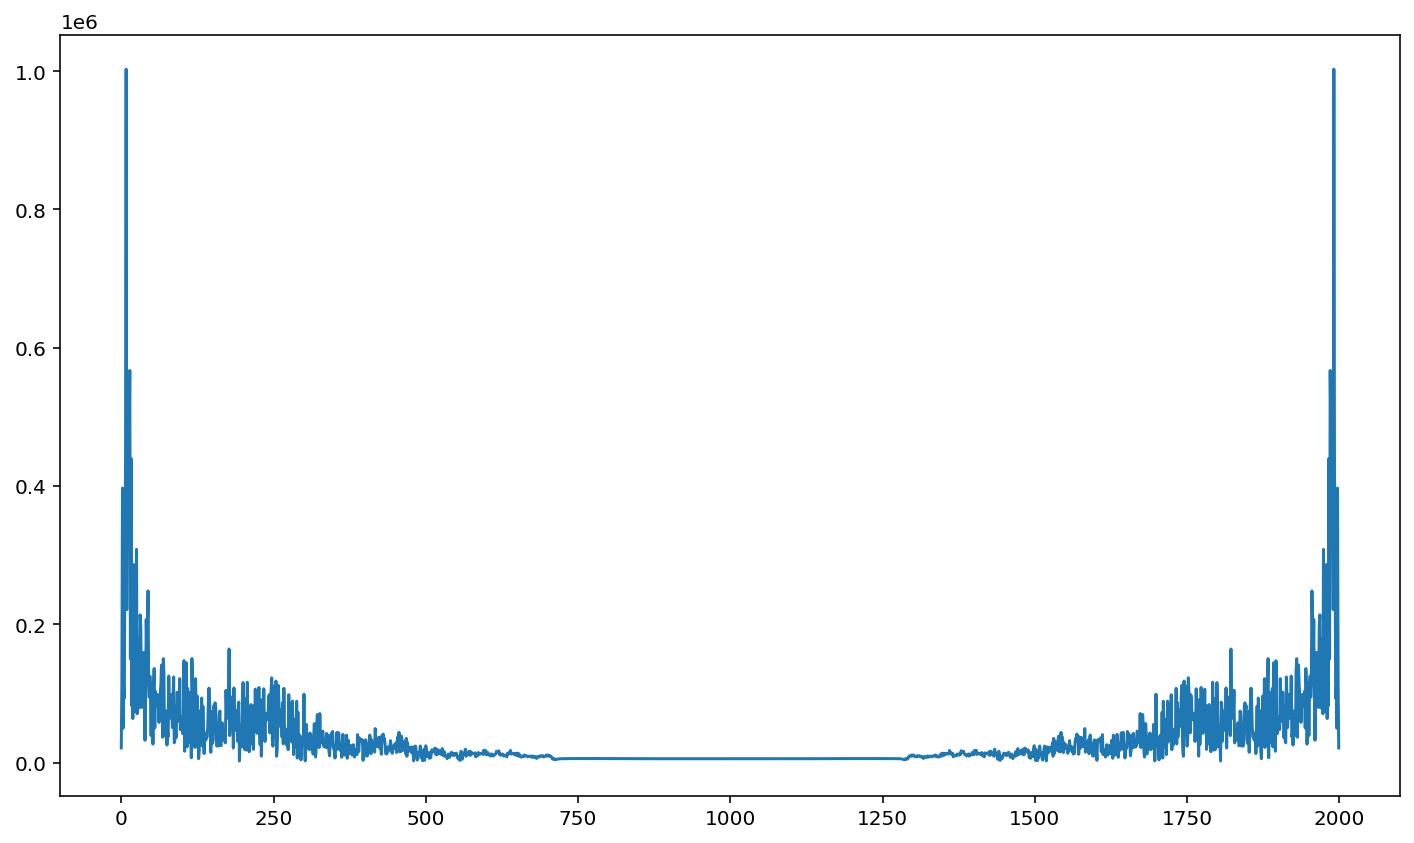

In [19]:
audio_l_mid = audio_l[10000:12000]

dft_test = np.abs(dft(audio_l_mid)) #plot the dft for 1/20th of a second.
                                    #this took about a minute or two   
plt.plot(np.abs(dft(audio_l_mid)))
plt.show()
#still running?

In [25]:
fft_test = np.abs(fft(audio_l_mid)) #plot fft for 1/20th of a second. this took 21 miliseconds

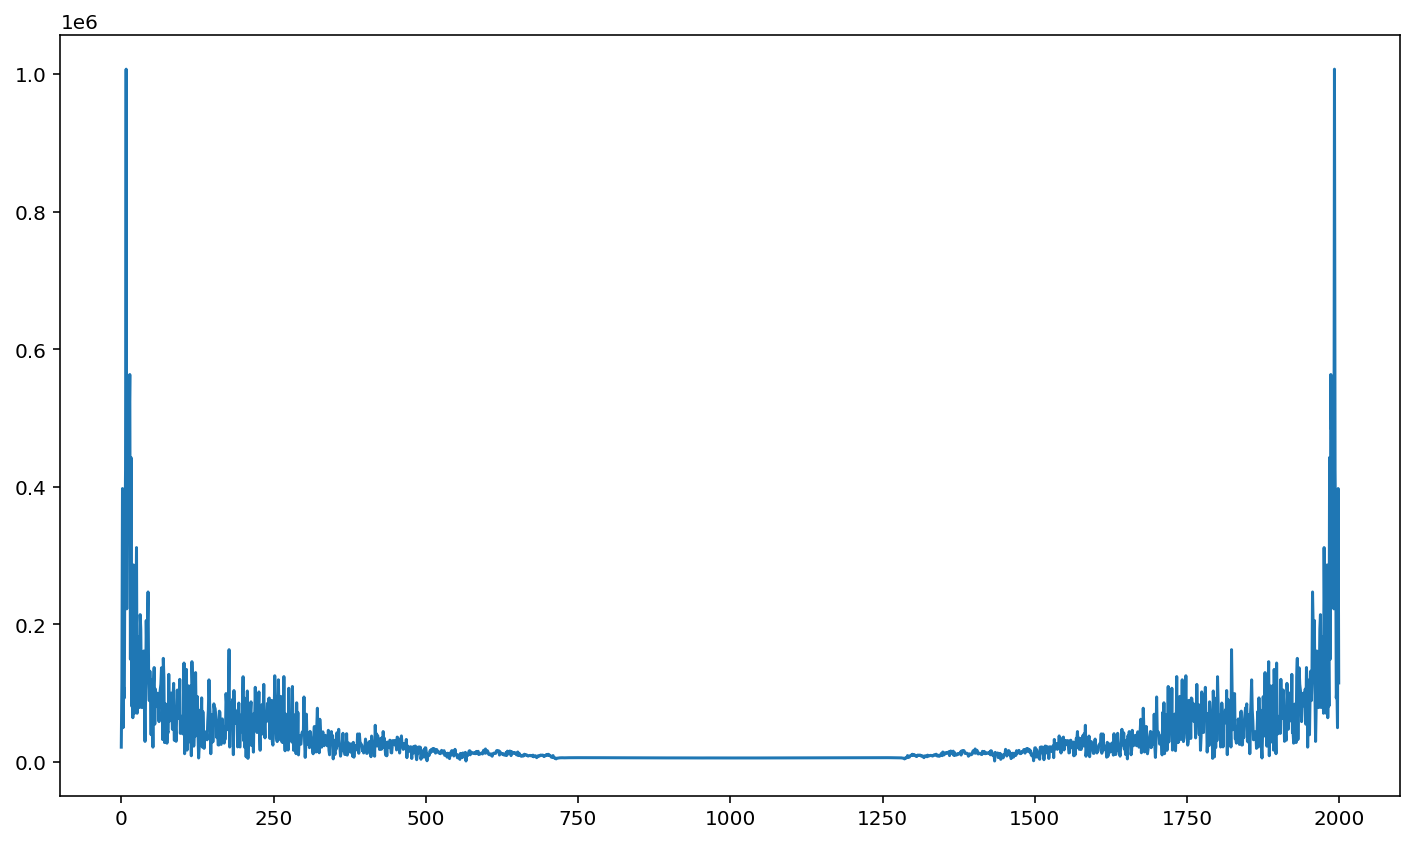

In [24]:
plt.plot(np.abs(fft(audio_l_mid)))  
plt.show()